# Two way Anova

In [96]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
import joblib as joblib
import scipy as sp
import statsmodels.api as sm
import pingouin as pg

In [97]:
# Create a dataset

df = pd.DataFrame({"water": np.repeat(["daily","weekly"],15),
                   "sun" : np.tile(np.repeat(["low","Medium","High"],5),2),
                   "Height" : [6,6,6,5,6,5,5,6,4,5,
                                6,6,7,8,7,3,6,7,5,5,
                                4,4,4,4,4,5,6,6,7,8] })
df.head(10)

,water,sun,Height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6
5,daily,Medium,5
6,daily,Medium,5
7,daily,Medium,6
8,daily,Medium,4
9,daily,Medium,5


We use one way anova for this comparison.

C:\Users\AsJad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='Height'>

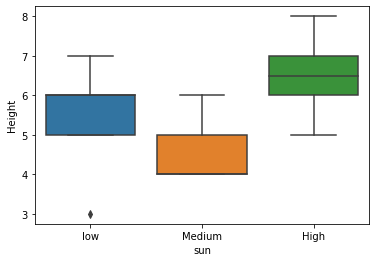

In [98]:
sns.boxplot(df["sun"],df["Height"])

# Example
Check significance difference of two labels.
For this comparison we use two way anova.

C:\Users\AsJad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='Height'>

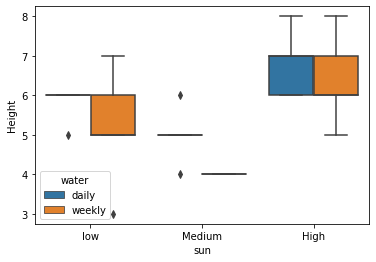

In [99]:
sns.boxplot(df["sun"],df["Height"],hue=df["water"])

In [100]:
# Two way Anova
from statsmodels.formula.api import ols
model = ols ("Height ~ C(sun) + C(water) + C(sun):C(water)",data = df).fit()
aov_table = sm.stats.anova_lm(model, type =2)
print(aov_table)

# PR value is greater than 0.05 then no significant effect
# Less than 0.05 then significant effect.

                   df     sum_sq    mean_sq          F    PR(>F)
C(sun)            2.0  22.066667  11.033333  13.510204  0.000117
C(water)          1.0   3.333333   3.333333   4.081633  0.054647
C(sun):C(water)   2.0   0.466667   0.233333   0.285714  0.753998
Residual         24.0  19.600000   0.816667        NaN       NaN


# Turkey HSD TEST

In [101]:
# First calculate anova table
aov = pg.anova(data = df ,dv = "Height", between = ["sun","water"], detailed = "True")
print(aov)

# PR value is greater than 0.05 then no significant effect
# Less than 0.05 then significant effect.

        Source         SS  DF         MS          F     p-unc       np2
0          sun  22.066667   2  11.033333  13.510204  0.000117  0.529600
1        water   3.333333   1   3.333333   4.081633  0.054647  0.145349
2  sun * water   0.466667   2   0.233333   0.285714  0.753998  0.023256
3     Residual  19.600000  24   0.816667        NaN       NaN       NaN


In [102]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [103]:
# Turkey HSD Test for sun
mc = MultiComparison( df['Height'],df['sun'])
mc_result = mc.tukeyhsd (0.05)
mc_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Medium,-2.1,0.0001,-3.1323,-1.0677,True
High,low,-1.1,0.035,-2.1323,-0.0677,True
Medium,low,1.0,0.059,-0.0323,2.0323,False


In [104]:
# Turkey HSD Test for water
mc = MultiComparison( df['Height'],df['water'])
mc_result = mc.tukeyhsd (0.05)
mc_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
daily,weekly,-0.6667,0.1478,-1.5842,0.2509,False


To check the residual error

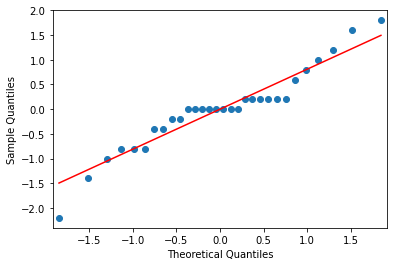

In [105]:
# qq norm plot
res = model.resid
fig = sm.qqplot(res,line='s')
plt.show()

# Straight line on points show show normal distribution